# The analysis for the presentation for the 05/03/2024

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns


In [2]:
def path_translator(experiement_name):

    result_folder = Path("../../Simulation_results/")
    file_name = "analyzed_" + experiement_name + ".csv"
    results_path = result_folder / experiement_name / file_name

    return results_path

# heatmaps


In [3]:
labels = ["No detected effect", 
          "Don't include the target HR",
          "Good HR detected",
          "Good HR detected with small CI"
          ]



In [4]:
import os 


experiment_name = "2024-04-19 : Heatmap of calubration 100-10000 aptients Exponential scenario"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 100]
# data_min_bic = data.loc[data.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]





In [5]:
data["error_bar"] = round(data["lower_IC"],2).astype(str) + " - " + round(data["higher_IC"],2).astype(str)

In [6]:
data["error_ratio"] = (data["higher_IC"] - data["higher_IC"])/data["HR_target"]
data

,Unnamed: 0,simulation_id,HR_target,scenario_functions,n_patients,max_time,doses,binarization_dose,n_knots,constraint,cutoff,n_bootstraps,BIC,HR,lower_IC,higher_IC,error_bar,error_ratio
0,1,2024-04-19 : Heatmap of calubration 100-10000 ...,1.0,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,5.329129e+02,3.138815,0.838528,14.109965,0.84 - 14.11,0.0
1,2,2024-04-19 : Heatmap of calubration 100-10000 ...,1.1,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,5.424549e+02,1.845589,0.583228,6.901668,0.58 - 6.9,0.0
2,3,2024-04-19 : Heatmap of calubration 100-10000 ...,1.2,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,5.314866e+02,1.226649,0.356389,3.745690,0.36 - 3.75,0.0
3,4,2024-04-19 : Heatmap of calubration 100-10000 ...,1.3,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,5.632782e+02,1.845244,0.761773,5.900993,0.76 - 5.9,0.0
4,5,2024-04-19 : Heatmap of calubration 100-10000 ...,1.4,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,6.271705e+02,1.406892,0.502449,3.742193,0.5 - 3.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,2024-04-19 : Heatmap of calubration 100-10000 ...,1.8,exponential_scenario,100000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,1.558984e+06,1.762411,1.714722,1.821236,1.71 - 1.82,0.0
87,88,2024-04-19 : Heatmap of calubration 100-10000 ...,1.9,exponential_scenario,100000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,1.556916e+06,1.769134,1.719123,1.829263,1.72 - 1.83,0.0
88,89,2024-04-19 : Heatmap of calubration 100-10000 ...,2.0,exponential_scenario,100000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,1.552757e+06,1.898342,1.840682,1.957403,1.84 - 1.96,0.0
89,90,2024-04-19 : Heatmap of calubration 100-10000 ...,2.5,exponential_scenario,100000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,1.550024e+06,2.337224,2.266828,2.406090,2.27 - 2.41,0.0


In [7]:
small_error_threshold = 0.1
medium_error_threshold = 0.25

conditions = [
    data["HR_target"] == 1,
    data['lower_IC'] <= 1,
    (data["lower_IC"] > 1) 
        & ((data["lower_IC"] > data["HR_target"]) | (data["higher_IC"] < data["HR_target"])),
    (data["lower_IC"] > 1)
        & ((data["lower_IC"] <= data["HR_target"]) & (data["higher_IC"] >= data["HR_target"]))
]


In [8]:
categories = [0,1,2,3]

categories_label = {
    0 : "Control",
    1 : "Cross HR = 1",
    2 : "Don't cross HR = 1\nDon't cross target HR",
    3 : "Don't cross HR = 1\nCross target HR"
}

data_categorized = data


data_categorized["heatmap_label"] = np.select(conditions,categories, default ="Unknown")
data_categorized

,Unnamed: 0,simulation_id,HR_target,scenario_functions,n_patients,max_time,doses,binarization_dose,n_knots,constraint,cutoff,n_bootstraps,BIC,HR,lower_IC,higher_IC,error_bar,error_ratio,heatmap_label
0,1,2024-04-19 : Heatmap of calubration 100-10000 ...,1.0,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,5.329129e+02,3.138815,0.838528,14.109965,0.84 - 14.11,0.0,0
1,2,2024-04-19 : Heatmap of calubration 100-10000 ...,1.1,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,5.424549e+02,1.845589,0.583228,6.901668,0.58 - 6.9,0.0,1
2,3,2024-04-19 : Heatmap of calubration 100-10000 ...,1.2,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,5.314866e+02,1.226649,0.356389,3.745690,0.36 - 3.75,0.0,1
3,4,2024-04-19 : Heatmap of calubration 100-10000 ...,1.3,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,5.632782e+02,1.845244,0.761773,5.900993,0.76 - 5.9,0.0,1
4,5,2024-04-19 : Heatmap of calubration 100-10000 ...,1.4,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,6.271705e+02,1.406892,0.502449,3.742193,0.5 - 3.74,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,2024-04-19 : Heatmap of calubration 100-10000 ...,1.8,exponential_scenario,100000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,1.558984e+06,1.762411,1.714722,1.821236,1.71 - 1.82,0.0,3
87,88,2024-04-19 : Heatmap of calubration 100-10000 ...,1.9,exponential_scenario,100000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,1.556916e+06,1.769134,1.719123,1.829263,1.72 - 1.83,0.0,2
88,89,2024-04-19 : Heatmap of calubration 100-10000 ...,2.0,exponential_scenario,100000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,1.552757e+06,1.898342,1.840682,1.957403,1.84 - 1.96,0.0,2
89,90,2024-04-19 : Heatmap of calubration 100-10000 ...,2.5,exponential_scenario,100000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,1.550024e+06,2.337224,2.266828,2.406090,2.27 - 2.41,0.0,2


In [9]:
data.columns

Index(['Unnamed: 0', 'simulation_id', 'HR_target', 'scenario_functions',
       'n_patients', 'max_time', 'doses', 'binarization_dose', 'n_knots',
       'constraint', 'cutoff', 'n_bootstraps', 'BIC', 'HR', 'lower_IC',
       'higher_IC', 'error_bar', 'error_ratio', 'heatmap_label'],
      dtype='object')

n_patients
100       object
500       object
1000      object
5000      object
10000     object
50000     object
100000    object
dtype: object
n_patients
100       int64
500       int64
1000      int64
5000      int64
10000     int64
50000     int64
100000    int64
dtype: object
n_patients        100          500          1000         5000         10000   \
HR_target                                                                      
3.0          0.99 - 9.32  1.54 - 4.27  2.08 - 4.38  2.14 - 2.79  2.56 - 3.11   
2.5          1.07 - 7.55  1.29 - 3.37  1.64 - 2.96  2.16 - 2.83    2.3 - 2.8   
2.0          0.43 - 4.08  1.14 - 2.62  1.83 - 3.44  1.66 - 2.21  1.76 - 2.16   
1.9          0.38 - 5.84   1.9 - 4.78  1.63 - 3.06  1.72 - 2.26  1.65 - 1.99   
1.8         0.98 - 14.04  0.69 - 1.89  1.28 - 2.44  1.52 - 1.97  1.51 - 1.85   
1.7          0.91 - 7.31   0.97 - 2.5   1.25 - 2.2  1.62 - 2.13  1.52 - 1.86   
1.6          0.64 - 6.63  1.29 - 3.15  1.62 - 3.02  1.37 - 1.78  1.31 - 1.61   

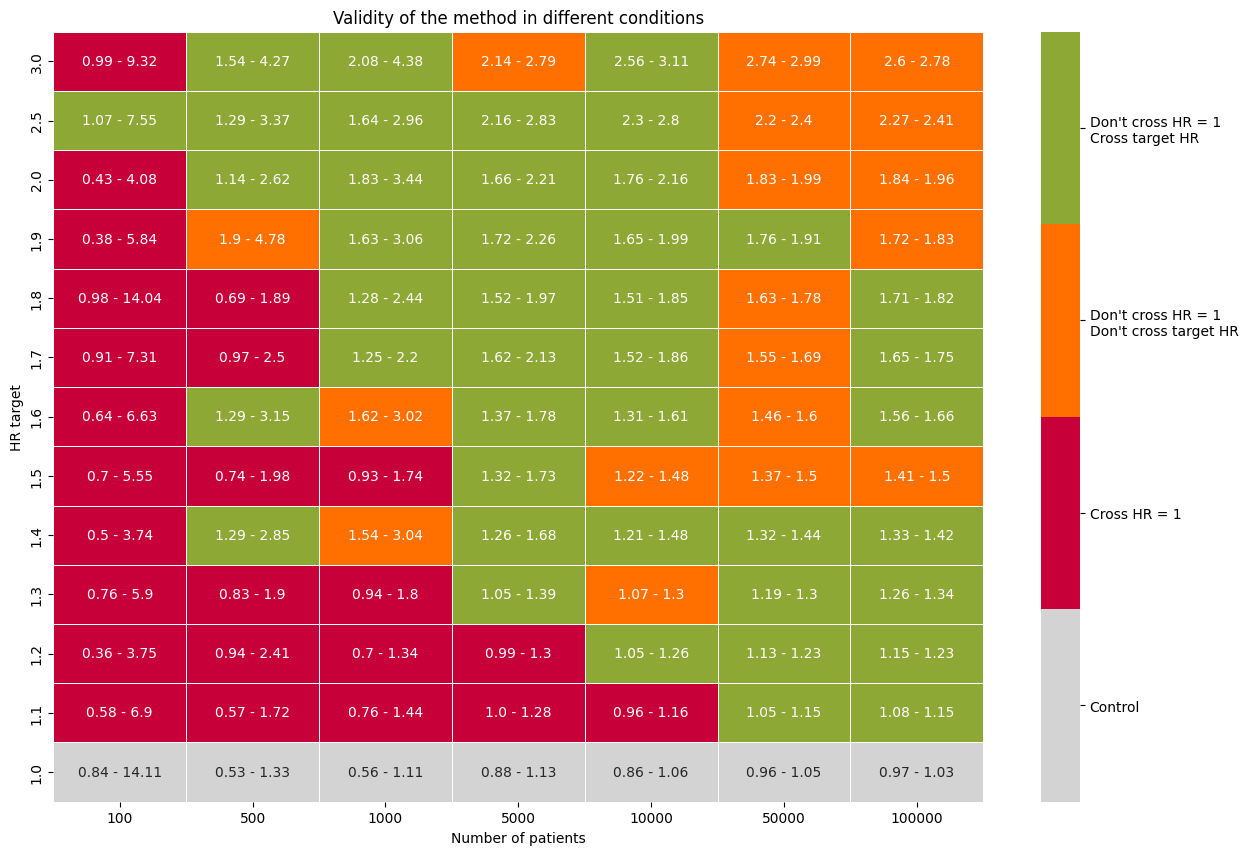

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches


# create dictionary with value to integer mappings

plt.rcParams["figure.figsize"] = (15,10)


data_pivot = data_categorized.pivot(values='heatmap_label', index='HR_target', columns='n_patients').sort_index(ascending=False)
print(data_pivot.dtypes)
data_pivot = data_pivot.map(pd.to_numeric)
print(data_pivot.dtypes)
# print(data_pivot)
n = len(categories)    
# discrete colormap (n samples from a given cmap)

data_2_pivot = data_categorized.pivot(values='error_bar', index='HR_target', columns='n_patients').sort_index(ascending=False)
print(data_2_pivot)

palette = ["#D3D3D3", "#C70039", "#FF7000", "#8EA836"]

cmap = sns.color_palette(palette, n) 
ax = sns.heatmap(data_pivot, cmap = cmap,linewidths = 0.5,annot = data_2_pivot, fmt ="") 
plt.title("Validity of the method in different conditions")
plt.xlabel("Number of patients")
plt.ylabel("HR target")

# # modify colorbar:
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(categories_label[category] for category in categories))                                          
plt.show()


In [38]:
data_categorized.error_ratio

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
86    0.0
87    0.0
88    0.0
89    0.0
90    0.0
Name: error_ratio, Length: 91, dtype: float64

In [11]:
def path_translator(experiement_name):

    
    file_name = "analyzed_" + experiement_name + ".csv"
    results_path = result_folder / experiement_name / file_name

    return results_path

# Benchmarks

In [10]:
# Data simulation

result_folder = Path("../../Simulation_results/")

experiment_name = "2024-04-22 : benchmark CPU old permalgo"
file_name =  experiment_name + ".csv"
file_path = result_folder / experiment_name / file_name
data_cpu_old_permalgo = pd.read_csv(file_path)

experiment_name = "2024-04-22 : benchmark CPU no bootstraps"
file_name =  experiment_name + ".csv"
file_path = result_folder / experiment_name / file_name
data_cpu_no_bootstraps = pd.read_csv(file_path)
data_cpu_no_bootstraps = data_cpu_no_bootstraps.iloc[1:]


experiment_name = "2024-04-22 : benchmark CPU"
file_name =  experiment_name + ".csv"
file_path = result_folder / experiment_name / file_name
data_cpu = pd.read_csv(file_path)
data_cpu = data_cpu.iloc[1:]

experiment_name = "2024-04-22 : benchmark GPU"
file_name =  experiment_name + ".csv"
file_path = result_folder / experiment_name / file_name
data_gpu = pd.read_csv(file_path)
data_gpu = data_gpu.iloc[1:]


6442/276

In [41]:
6442/60/60

1.7894444444444444

In [42]:
data_cpu_no_bootstraps

,Unnamed: 0,n_patients,computation_type,simulation_time,computation_time_no_bootstraps
1,2,100,CPU,0.176855,0.361412
2,3,200,CPU,0.328264,0.472492
3,4,500,CPU,0.863485,0.922837
4,5,1000,CPU,2.001762,1.794573
5,6,2000,CPU,5.297155,3.329660
6,7,5000,CPU,24.138426,7.634702
7,8,10000,CPU,81.362787,14.854080
8,9,20000,CPU,290.067288,28.710804
9,10,50000,CPU,1652.284200,87.569561
10,11,100000,CPU,6442.603513,203.532946


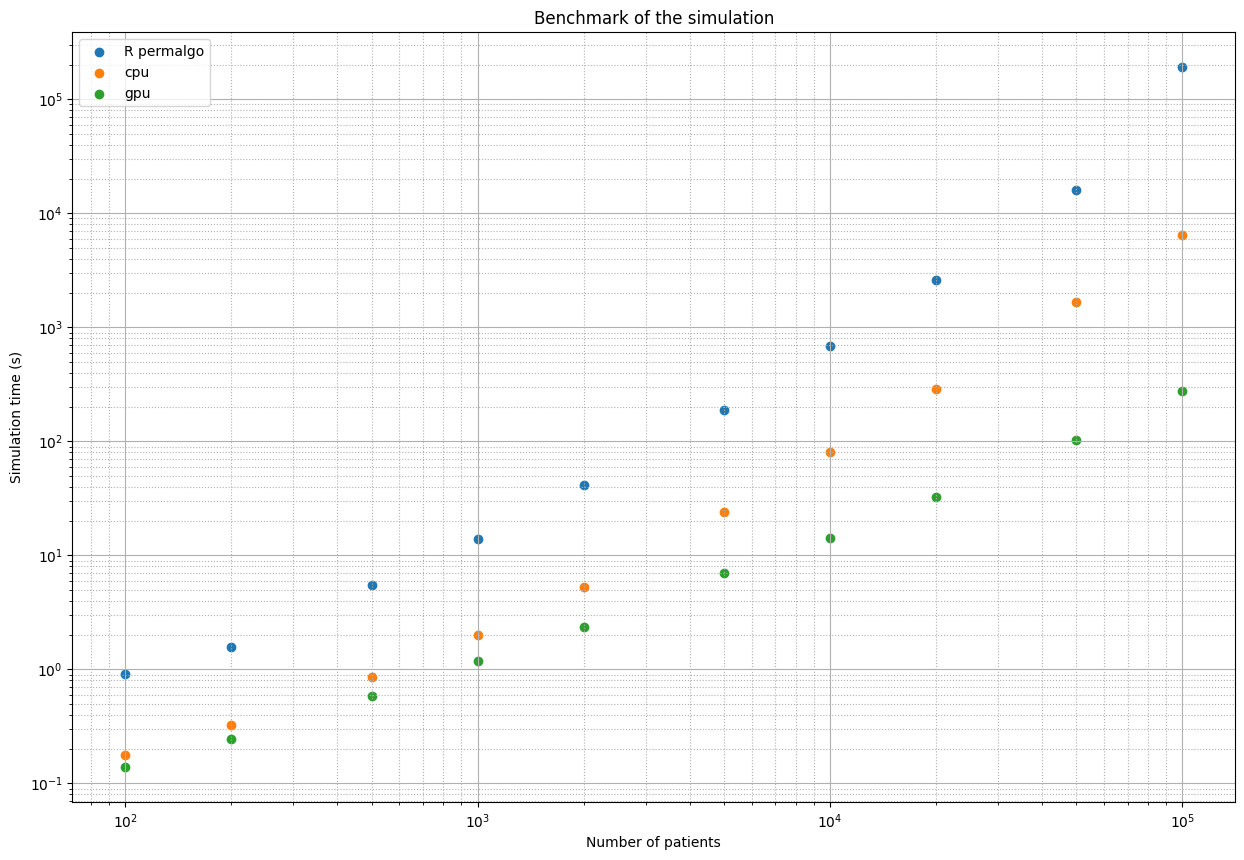

In [12]:
plt.figure(figsize=(15, 10))
plt.scatter(data_cpu_old_permalgo["n_patients"],data_cpu_old_permalgo["simulation_time"], label = "R permalgo")
plt.scatter(data_cpu_no_bootstraps["n_patients"],data_cpu_no_bootstraps["simulation_time"], label ="cpu" )
plt.scatter(data_gpu["n_patients"],data_gpu["simulation_time"], label = "gpu" )
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of patients")
plt.ylabel("Simulation time (s)")
plt.title("Benchmark of the simulation")



plt.legend()

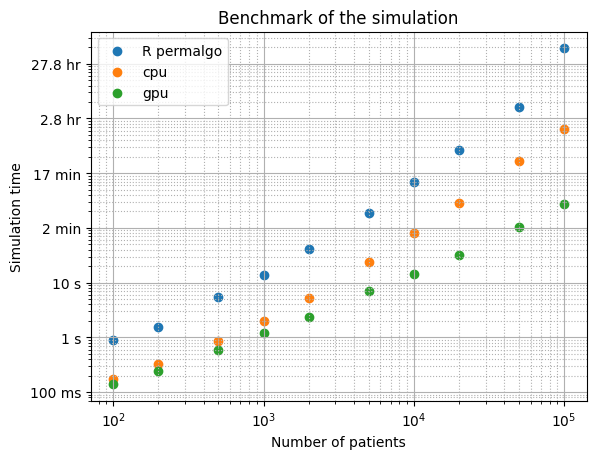

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def time_formatter(x, pos):
    if x < 1:  # less than 1 second, show in ms
        return f"{x * 1000:.0f} ms"
    elif x < 60:  # less than 60 seconds, show in seconds
        return f"{x:.0f} s"
    elif x < 3600:  # less than 3600 seconds, show in minutes
        return f"{x / 60:.0f} min"
    else:  # show in hours
        return f"{x / 3600:.1f} hr"

# Plotting
plt.scatter(data_cpu_old_permalgo["n_patients"], data_cpu_old_permalgo["simulation_time"], label = "R permalgo")
plt.scatter(data_cpu_no_bootstraps["n_patients"], data_cpu_no_bootstraps["simulation_time"], label = "cpu")
plt.scatter(data_gpu["n_patients"], data_gpu["simulation_time"], label = "gpu")
plt.legend()

plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.xscale("log")
plt.yscale("log")

# Apply the custom formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(time_formatter))

# Adding labels and title for clarity
plt.xlabel("Number of patients")
plt.ylabel("Simulation time")
plt.title("Benchmark of the simulation")

plt.show()


Text(0.5, 1.0, 'Benchmark of WCE with no bootstraps')

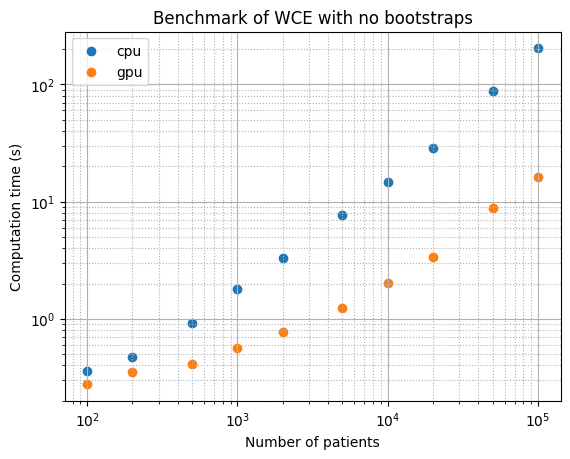

In [14]:
# plt.scatter(data_cpu_old_permalgo["n_patients"],data_cpu_old_permalgo["simulation_time"])
plt.scatter(data_cpu_no_bootstraps["n_patients"],data_cpu_no_bootstraps["computation_time_no_bootstraps"], label = "cpu")
plt.scatter(data_gpu["n_patients"],data_gpu["computation_time_no_bootstraps"], label ="gpu")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of patients")
plt.ylabel("Computation time (s)")
plt.title("Benchmark of WCE with no bootstraps")

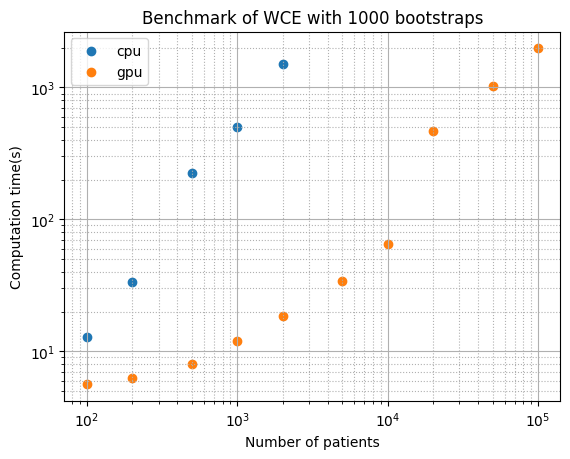

In [15]:
plt.scatter(data_cpu["n_patients"],data_cpu["computation_time_1000_bootstraps"], label = "cpu")
plt.scatter(data_gpu["n_patients"],data_gpu["computation_time_1000_bootstraps"], label ="gpu")
plt.grid(True, which="major", linestyle="-")
plt.grid(True, which="minor", linestyle="dotted")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of patients")
plt.ylabel("Computation time(s)")
plt.title("Benchmark of WCE with 1000 bootstraps")
plt.legend()

In [16]:
data_gpu

,Unnamed: 0,n_patients,computation_type,simulation_time,computation_time_no_bootstraps,computation_time_1000_bootstraps
1,2,100,GPU,0.138820,0.275998,5.627553
2,3,200,GPU,0.247375,0.350347,6.268923
3,4,500,GPU,0.583225,0.411453,8.058434
4,5,1000,GPU,1.180651,0.565355,12.014954
5,6,2000,GPU,2.367342,0.775732,18.640979
6,7,5000,GPU,6.972376,1.228978,34.427937
7,8,10000,GPU,14.171395,2.032565,65.377238
8,9,20000,GPU,32.469452,3.390764,469.300693
9,10,50000,GPU,102.556962,8.809347,1027.088605
10,11,100000,GPU,276.467345,16.085948,1980.173613


In [17]:
def plot_HR(ax,data,HR_target):
    sub_data = data[data["HR_target"]==HR_target]
    # sub_data = sub_data[sub_data["n_patients"] > 100]
    n_patients = list(sub_data["n_patients"].unique())
    means = sub_data["HR"]
    lowers = list(sub_data["lower_IC"])
    highers = list(sub_data["higher_IC"])

    print(n_patients)

    minlower = min(lowers)
    maxhigher = max(highers)

    lower_errors = np.maximum(0, means - lowers)
    higher_errors = np.maximum(0, highers - means)
    errors = [lower_errors, higher_errors]
    ax.errorbar(n_patients, means, yerr=errors, fmt='o', capsize=5, color ="black",label = "Calculated result")


    return ax, minlower, maxhigher


In [18]:
experiment_name = "2024-04-18 : analysis 1 knot exponential scenario 100 - 100 000 "
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data = data[data["n_patients"] >= 500]

print(len(data))
print(data)

# data_min_bic = data.loc[data.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]

# experiment_name = "Null_weight"
# file_path = path_translator(experiment_name)
# data_null = pd.read_csv(file_path)
# data_null_min_bic = data_null.loc[data_null.groupby(['n_patients', 'HR_target'])['BIC_results'].idxmin()]


40
    Unnamed: 0                                      simulation_id  HR_target  \
10          11  2024-04-18 : analysis 1 knot exponential scena...       1.00   
11          12  2024-04-18 : analysis 1 knot exponential scena...       1.25   
12          13  2024-04-18 : analysis 1 knot exponential scena...       1.50   
13          14  2024-04-18 : analysis 1 knot exponential scena...       2.00   
14          15  2024-04-18 : analysis 1 knot exponential scena...       2.80   
15          16  2024-04-18 : analysis 1 knot exponential scena...       1.00   
16          17  2024-04-18 : analysis 1 knot exponential scena...       1.25   
17          18  2024-04-18 : analysis 1 knot exponential scena...       1.50   
18          19  2024-04-18 : analysis 1 knot exponential scena...       2.00   
19          20  2024-04-18 : analysis 1 knot exponential scena...       2.80   
20          21  2024-04-18 : analysis 1 knot exponential scena...       1.00   
21          22  2024-04-18 : analysis

[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


Text(0.5, 1.0, 'Target HR: 2.8')

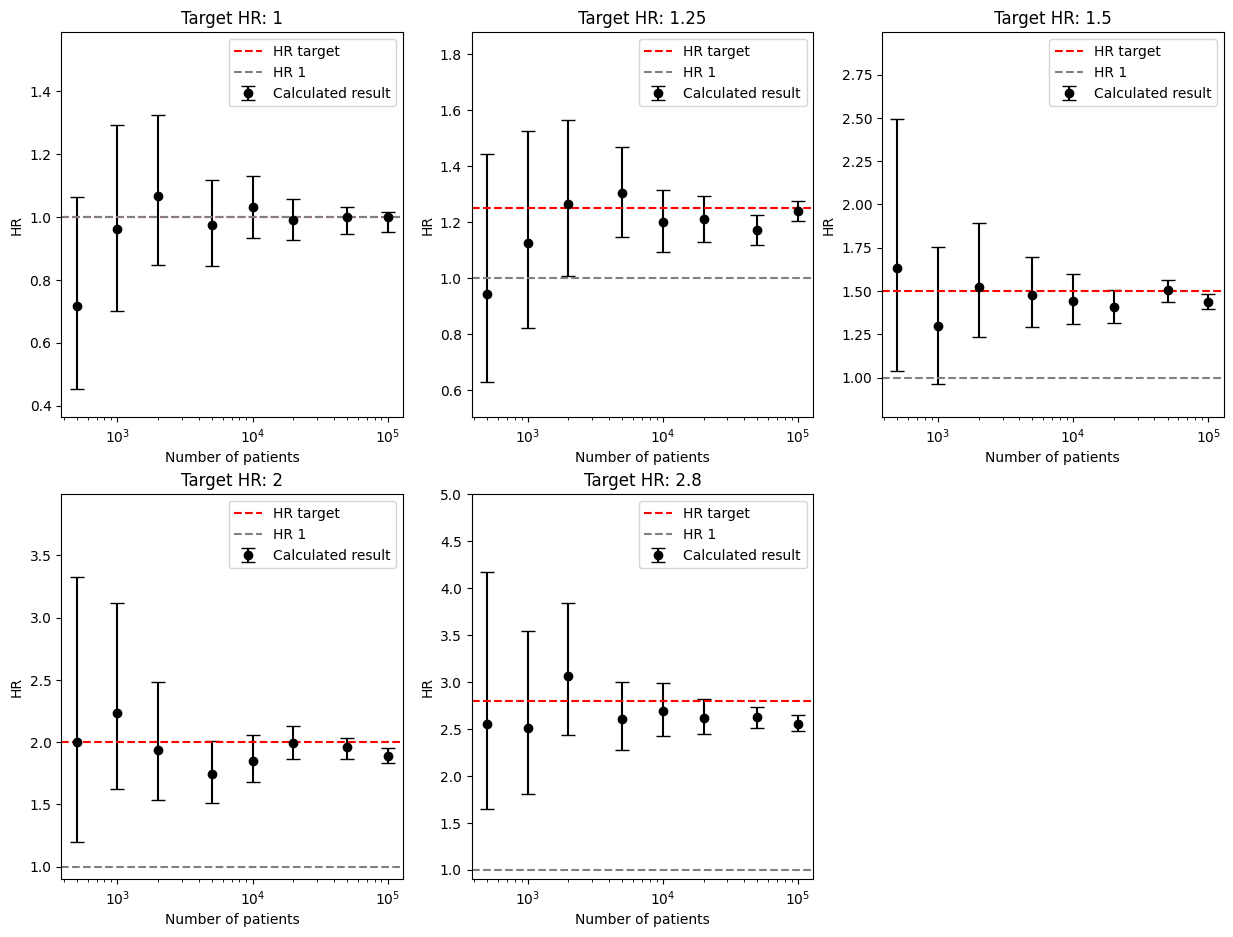

In [50]:


plt.figure(figsize=(15, 11))

##############""
HR_target = 1
ax = plt.subplot(2, 3, 1) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")



HR_target = 1.25
ax = plt.subplot(2,3, 2) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)
plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############
HR_target = 1.5
ax = plt.subplot(2, 3, 3) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)



plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


###########

HR_target = 2
ax = plt.subplot(2, 3, 4) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)


plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############""
HR_target = 2.8
ax = plt.subplot(2, 3, 5) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)



plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


In [51]:
experiment_name = "2024-04-22 : validation other scenario than ES"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
print(data["scenario_functions"].unique())
data = data[data["n_patients"] >= 500]
data = data[data["scenario_functions"] == "bi_linear_scenario"]



['bi_linear_scenario' 'early_peak_scenario' 'inverted_u_scenario']


[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


Text(0.5, 1.0, 'Target HR: 2.8')

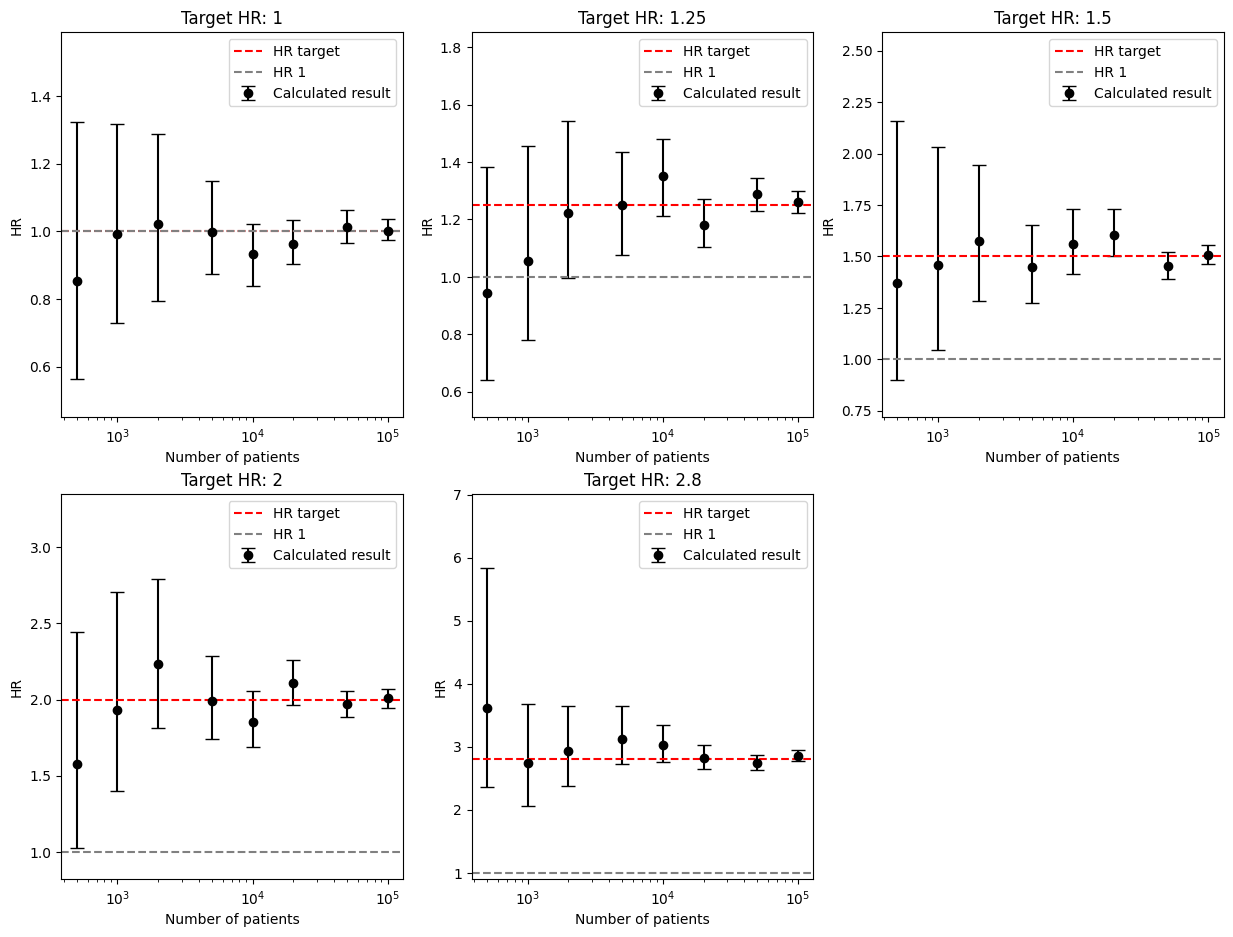

In [57]:

plt.figure(figsize=(15, 11))

##############""
HR_target = 1
ax = plt.subplot(2, 3, 1) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")



HR_target = 1.25
ax = plt.subplot(2,3, 2) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)
plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############
HR_target = 1.5
ax = plt.subplot(2, 3, 3) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)



plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


###########

HR_target = 2
ax = plt.subplot(2, 3, 4) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)


plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############""
HR_target = 2.8
ax = plt.subplot(2, 3, 5) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)



plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


In [ ]:
experiment_name = "2024-04-22 : validation other scenario than ES"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
print(data["scenario_functions"].unique())
data = data[data["n_patients"] >= 500]
data = data[data["scenario_functions"] == "early_peak_scenario"]

['bi_linear_scenario' 'early_peak_scenario' 'inverted_u_scenario']


[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


Text(0.5, 1.0, 'Target HR: 2.8')

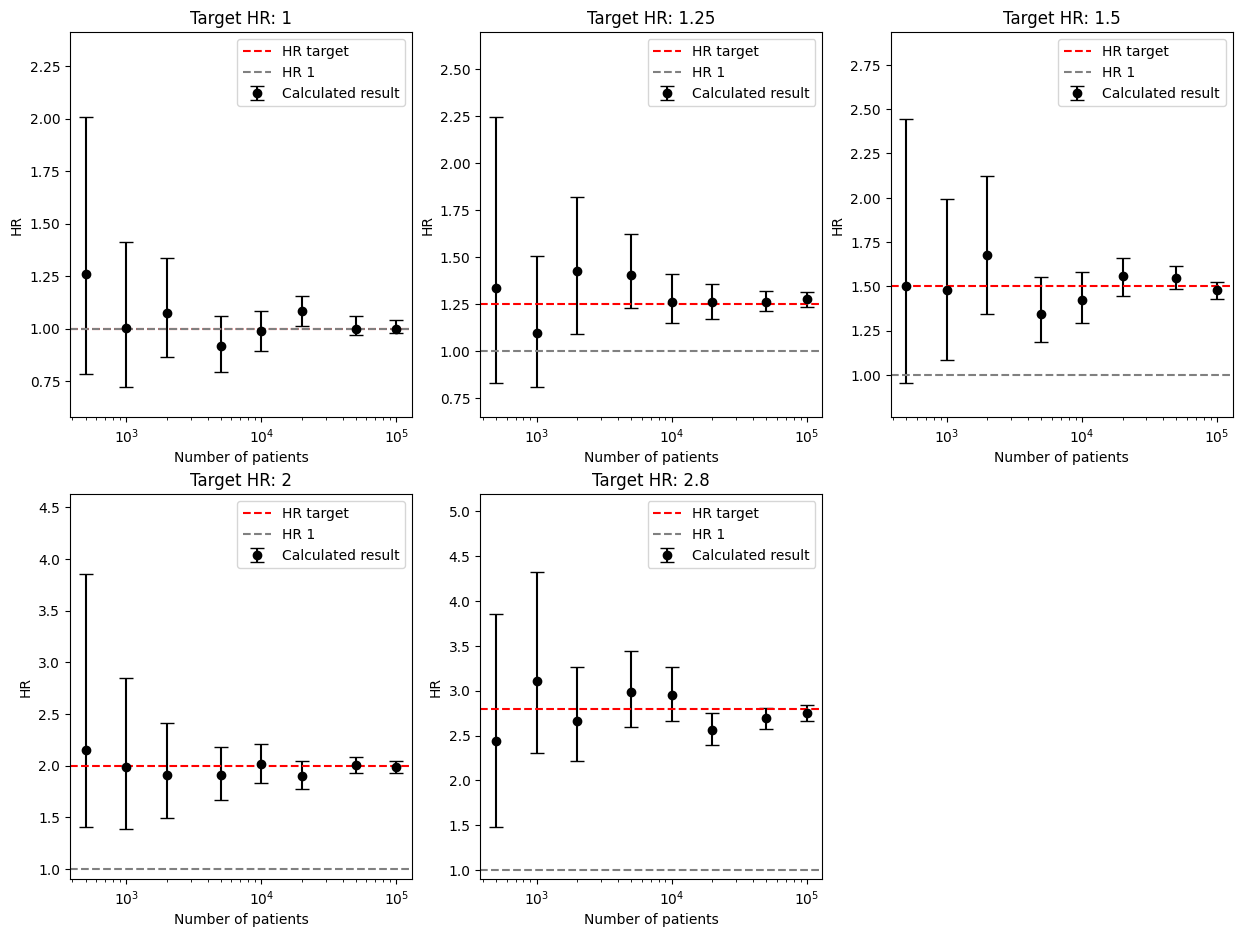

In [ ]:

plt.figure(figsize=(15, 11))

##############""
HR_target = 1
ax = plt.subplot(2, 3, 1) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")



HR_target = 1.25
ax = plt.subplot(2,3, 2) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)
plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############
HR_target = 1.5
ax = plt.subplot(2, 3, 3) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)



plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


###########

HR_target = 2
ax = plt.subplot(2, 3, 4) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)


plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############""
HR_target = 2.8
ax = plt.subplot(2, 3, 5) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)



plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")

In [58]:
experiment_name = "2024-04-22 : validation other scenario than ES"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
print(data["scenario_functions"].unique())
data = data[data["n_patients"] >= 500]
data = data[data["scenario_functions"] == "inverted_u_scenario"]

['bi_linear_scenario' 'early_peak_scenario' 'inverted_u_scenario']


0


[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


Text(0.5, 1.0, 'Target HR: 2.8')

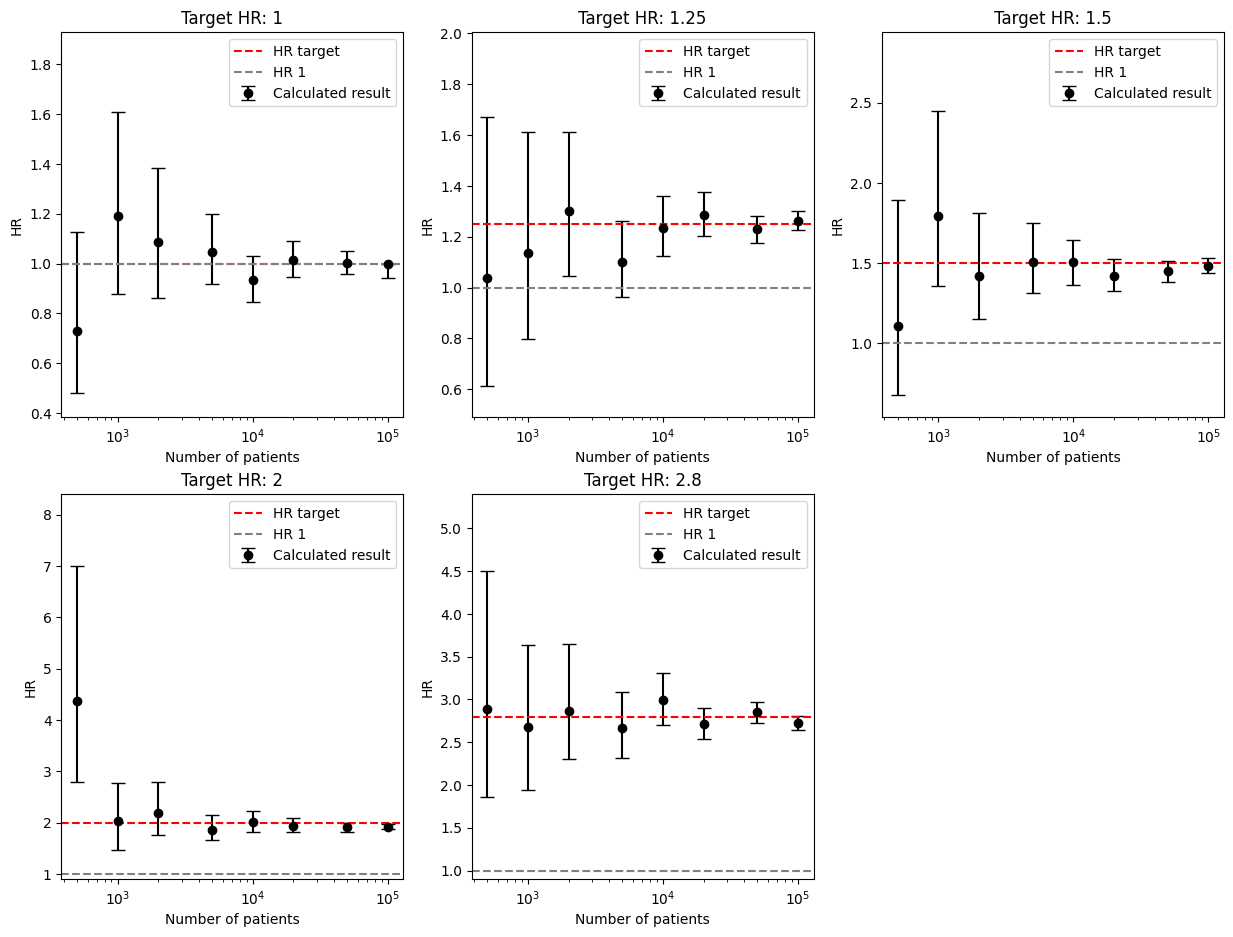

In [59]:
import pandas as pd

plt.figure(figsize=(15, 11))

##############""
HR_target = 1
ax = plt.subplot(2, 3, 1) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")



HR_target = 1.25
ax = plt.subplot(2,3, 2) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)
plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############
HR_target = 1.5
ax = plt.subplot(2, 3, 3) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)

plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)



plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


###########

HR_target = 2
ax = plt.subplot(2, 3, 4) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)


plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")


##############""
HR_target = 2.8
ax = plt.subplot(2, 3, 5) 
ax, min_lower, max_higher = plot_HR(ax,data,HR_target)



plt.axhline(y=HR_target, color='red', linestyle='dashed', label = 'HR target')
plt.axhline(y=1, color='grey', linestyle='dashed', label = 'HR 1')
plt.ylim(min(0.9,min_lower * 0.8),max_higher * 1.2)

plt.ylabel("HR")
plt.xlabel("Number of patients")
plt.legend()
plt.xscale('log')
plt.title(f"Target HR: {HR_target}")




KeyError: 'simulation_time'

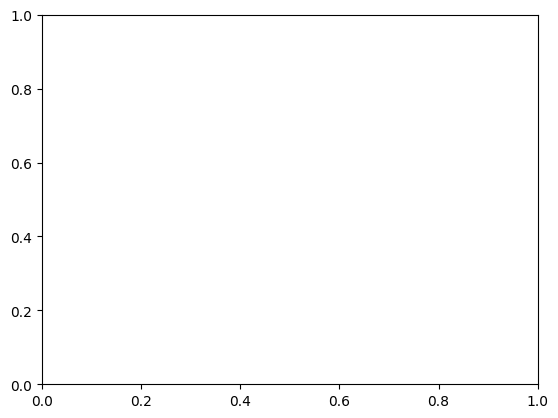

In [22]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Iterate over the variables containing the data
variables = [data, data_categorized, data_cpu, data_cpu_no_bootstraps, data_cpu_old_permalgo, data_gpu]
labels = ['data', 'data_categorized', 'data_cpu', 'data_cpu_no_bootstraps', 'data_cpu_old_permalgo', 'data_gpu']

for variable, label in zip(variables, labels):
    # Plot the data
    ax.plot(variable['n_patients'], variable['simulation_time'], label=label)

# Set the x-axis label
ax.set_xlabel('Number of Patients')

# Set the y-axis label
ax.set_ylabel('Simulation Time')

# Set the title
ax.set_title('Simulation Time vs Number of Patients')

# Add a legend
ax.legend()

# Show the plot
plt.show()


      Name  Age Gender
0    Alice   25      F
1      Bob   30      M
2  Charlie   35      M
[500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]


NameError: name 'tables' is not defined

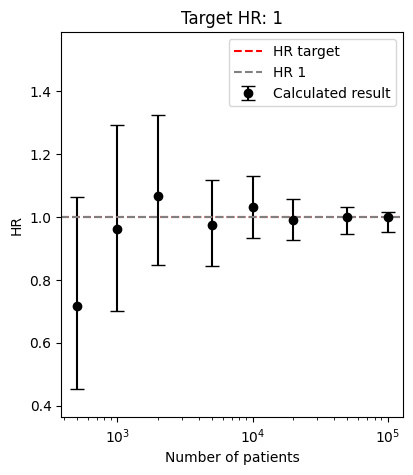

In [20]:

# create a dataframe with sample data
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'], 'Age': [25, 30, 35], 'Gender': ['F', 'M', 'M']})
print(df)

# create a list of HR targets
HR_targets = [1, 1.25, 1.5, 2, 2.8]

# iterate over HR targets
for i, HR_target in enumerate(HR_targets):
    plt.figure(figsize=(15, 11))
    ax = plt.subplot(2, 3, i+1)
    ax, min_lower, max_higher = plot_HR(ax, data, HR_target)
    plt.axhline(y=HR_target, color='red', linestyle='dashed', label='HR target')
    plt.axhline(y=1, color='grey', linestyle='dashed', label='HR 1')
    plt.ylim(min(0.9, min_lower * 0.8), max_higher * 1.2)
    plt.ylabel("HR")
    plt.xlabel("Number of patients")
    plt.legend()
    plt.xscale('log')
    plt.title(f"Target HR: {HR_target}")



In [ ]:
def get_scenario(scenario_name: int,max_time:int):
    """
    For each scenario function implemeted, this function will take into input the scenario name and the cutoff
    and return the list of the scenario shape normalized so that the sum of the weights is 
    equal to 1.

    The scenario function mus be defined and added to the dicitonanry scenario list
    """

    scenario_list = {
        "exponential_scenario" : exponential_scenario,
        "bi_linear_scenario" : bi_linear_scenario,
        "early_peak_scenario" :early_peak_scenario,
        "inverted_u_scenario" : inverted_u_scenario,

    }

    try:
        scenario_function = scenario_list[scenario_name]
    except KeyError:
        print("The scenario ",scenario_name, " is not defined")


    scenario_list = []


    normalization_factor = 0

    for i in range(0,365):
        normalization_factor += scenario_function(i)

    for i in range(0,max_time):
        scenario_list.append(scenario_function(i)) 

    scenario_list = np.array(scenario_list)


    return scenario_list/normalization_factor

def exponential_scenario(u_t, name = False):
    return((7 * np.exp(-7*u_t/365))) # divide by 365 in order to have a t in days

def bi_linear_scenario(u_t):
    if u_t < 50:
        return (1- (u_t/365)/(50/365))
    return 0 

def early_peak_scenario(u_t):
    return norm.pdf(u_t/365, 0.04, 0.05)


def inverted_u_scenario(u_t):
    return norm.pdf(u_t/365, 0.2, 0.06)


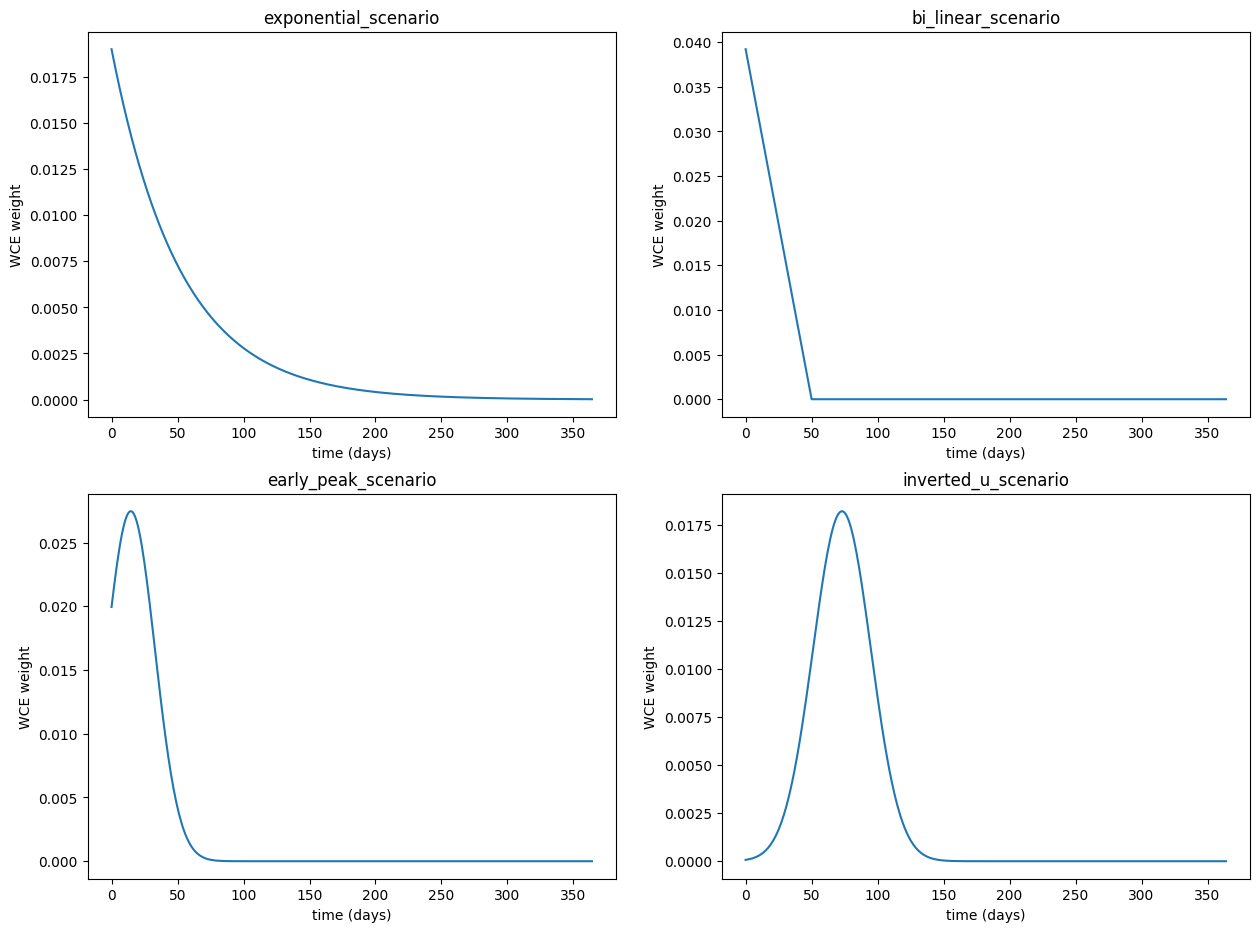

In [ ]:
from scipy.stats import norm

scenario = get_scenario("exponential_scenario",365)

plt.figure(figsize=(15, 11))



scenario_list = ["exponential_scenario","bi_linear_scenario","early_peak_scenario","inverted_u_scenario"]
i = 0
for scenario_name in scenario_list:
    i+=1
    scenario = get_scenario(scenario_name,365)
    ax = plt.subplot(2, 2, i)    
    ax = plt.plot(scenario)
    plt.xlabel("time (days)")
    plt.ylabel("WCE weight")
    plt.title(scenario_name)
    

# Analysis reproducibility simulation


In [63]:
experiment_name = "2024-04-25 : variability simulation 100000"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)

# experiment_name = "2024-04-24 : variability simulation 100000"
# file_path = path_translator(experiment_name)
# data_2 = pd.read_csv(file_path)


In [65]:
data

,Unnamed: 0,simulation_id,HR_target,scenario_functions,n_patients,max_time,doses,binarization_dose,n_knots,constraint,cutoff,n_bootstraps,BIC,HR,lower_IC,higher_IC
0,1,2024-04-25 : variability simulation 100000_con...,1.5,exponential_scenario,1000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,8634.472584,1.086045,0.789518,1.509874
1,2,2024-04-25 : variability simulation 100000_con...,1.5,exponential_scenario,1000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,8530.518827,1.385478,1.004030,1.966063
2,3,2024-04-25 : variability simulation 100000_con...,1.5,exponential_scenario,1000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,8996.157026,1.485715,1.110311,2.014626
3,4,2024-04-25 : variability simulation 100000_con...,1.5,exponential_scenario,1000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,8740.242752,1.464612,1.068883,2.018076
4,5,2024-04-25 : variability simulation 100000_con...,1.5,exponential_scenario,1000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,8689.468605,1.699209,1.291438,2.340630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2024-04-25 : variability simulation 100000_con...,1.5,exponential_scenario,10000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,121210.542921,1.373524,1.239258,1.520396
196,197,2024-04-25 : variability simulation 100000_con...,1.5,exponential_scenario,10000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,120586.662316,1.500236,1.369752,1.651473
197,198,2024-04-25 : variability simulation 100000_con...,1.5,exponential_scenario,10000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,122382.984204,1.383799,1.258097,1.531356
198,199,2024-04-25 : variability simulation 100000_con...,1.5,exponential_scenario,10000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,120368.294049,1.529748,1.396258,1.689969


(0.0, 3.0)

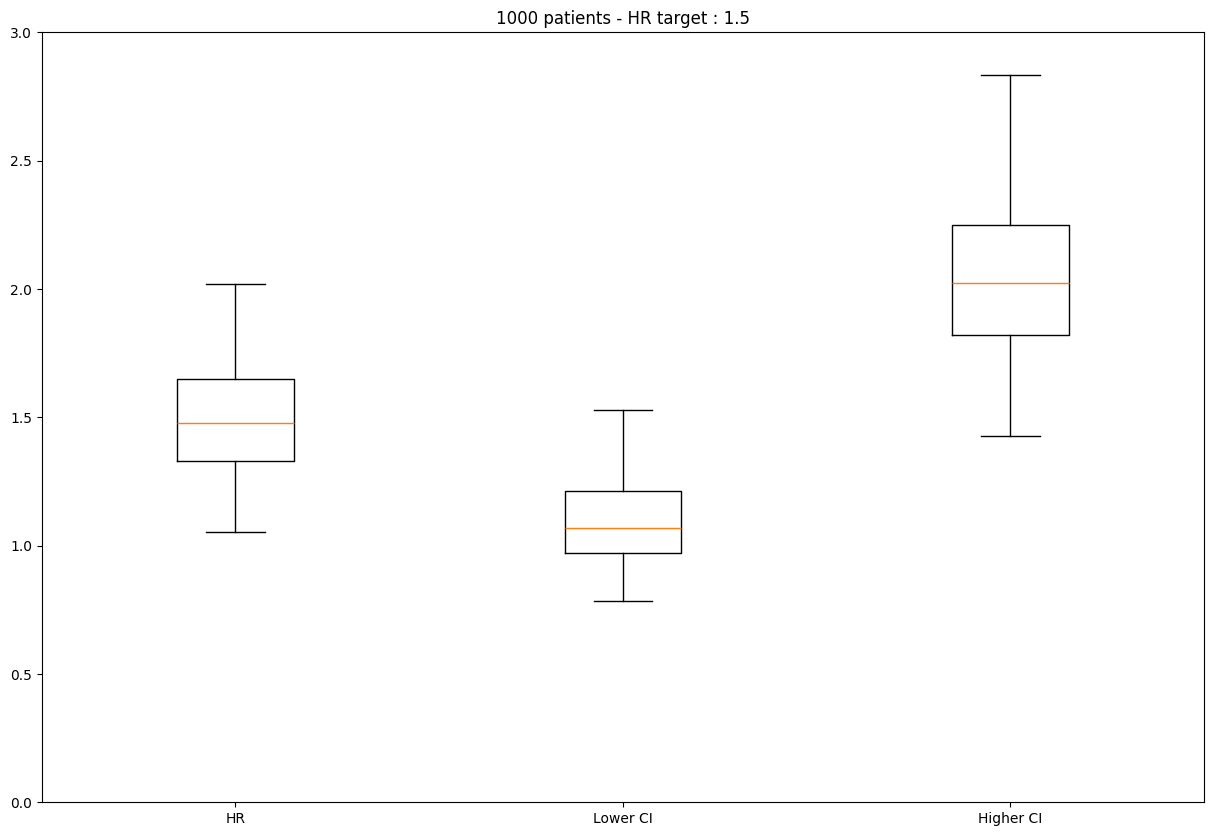

In [90]:
data_1000 = data[data["n_patients"]== 1000]
plt.boxplot([data_1000["HR"],data_1000["lower_IC"],data_1000["higher_IC"]],labels =["HR","Lower CI","Higher CI"])
plt.title("1000 patients - HR target : 1.5")
plt.ylim(0,3)

(0.0, 3.0)

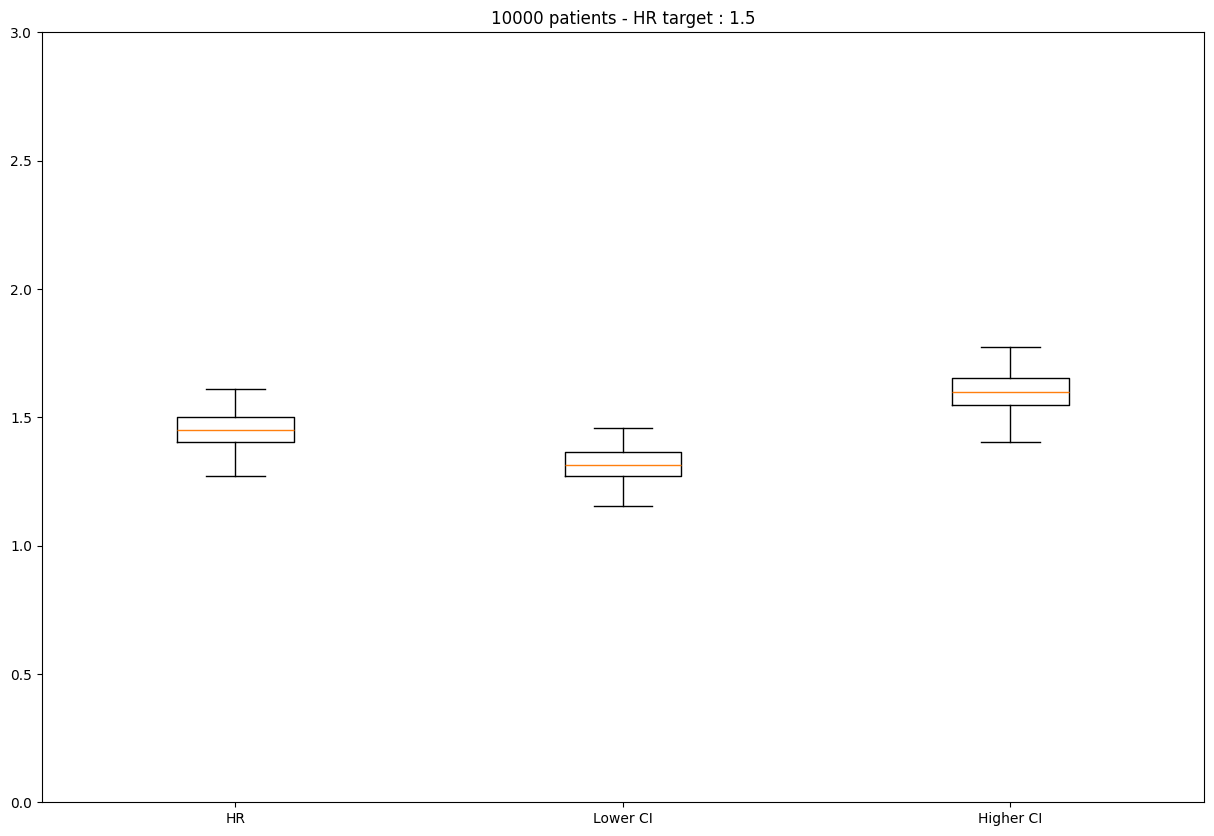

In [86]:
data_10000 = data[data["n_patients"]== 10000]
plt.boxplot([data_10000["HR"],data_10000["lower_IC"],data_10000["higher_IC"]],labels =["HR","Lower CI","Higher CI"])
plt.title("10000 patients - HR target : 1.5")
plt.ylim(0,3)

In [77]:
mean_1000 = data_1000["HR"].mean()
print(mean_1000)
mean_lower_1000 = data_1000["lower_IC"].mean()
print(mean_lower_1000)
mean_higher_1000 = data_1000["higher_IC"].mean()
print(mean_higher_1000)

1.4836582228682744
1.0885570039067978
2.042653774210638


In [78]:
mean_10000 = data_10000["HR"].mean()
print(mean_10000)
mean_lower_10000 = data_10000["lower_IC"].mean()
print(mean_lower_10000)
mean_higher_10000 = data_10000["higher_IC"].mean()
print(mean_higher_10000)

1.448296509077904
1.3146862501734526
1.5972334056573265


Text(0.5, 1.0, 'Means of 100 simulation experiments')

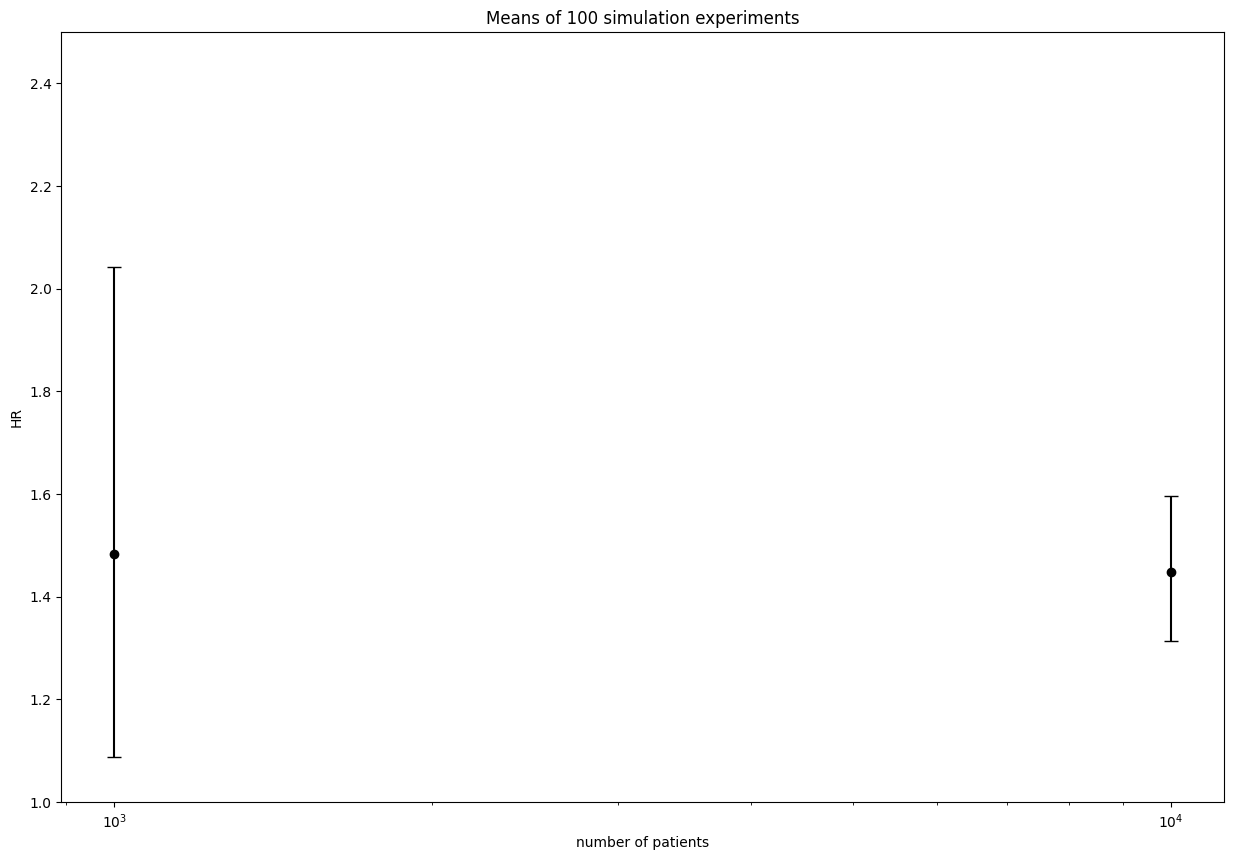

In [103]:
n_patients = [1000,10000]
means = [mean_1000,mean_10000]
errors = [[mean_1000- mean_lower_1000,mean_10000 - mean_lower_10000],[mean_higher_1000 -mean_1000,mean_higher_10000 - mean_10000]]

plt.errorbar(n_patients, means, yerr=errors, fmt='o', capsize=5, color ="black",label = "Calculated result")
plt.xscale("log")
plt.ylim(1,2.5)
plt.ylabel("HR")
plt.xlabel("number of patients")
plt.title("Means of 100 simulation experiments")


In [104]:
pip install pyreadr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 2.9 MB/s eta 0:00:001.6 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


PyreadrError: File b'../../2024-04-18 : validation simulation on exponential scenario/saved_model_1.rds' does not exist!

In [108]:
experiment_name = "2024-04-18 : validation simulation on exponential scenario"
file_path = path_translator(experiment_name)
data = pd.read_csv(file_path)
data

ez

,Unnamed: 0,simulation_id,HR_target,scenario_functions,n_patients,max_time,doses,binarization_dose,n_knots,constraint,cutoff,n_bootstraps,BIC,HR,lower_IC,higher_IC,path_model
0,1,2024-04-18 : validation simulation on exponent...,1.0,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,5.108626e+02,1.238136,0.370429,4.115682,saved_model_20
1,2,2024-04-18 : validation simulation on exponent...,1.0,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,2,R,180,1000,5.172799e+02,1.234964,0.377826,4.360555,saved_model_20
2,3,2024-04-18 : validation simulation on exponent...,1.0,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,3,R,180,1000,5.203328e+02,1.130013,0.345679,3.894232,saved_model_20
3,4,2024-04-18 : validation simulation on exponent...,1.5,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,5.440761e+02,4.885336,1.202137,25.795015,saved_model_20
4,5,2024-04-18 : validation simulation on exponent...,1.5,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,2,R,180,1000,5.458954e+02,5.749751,1.303087,33.980338,saved_model_20
5,6,2024-04-18 : validation simulation on exponent...,1.5,exponential_scenario,100,365,"c(1, 1.5, 2, 2.5, 3)",False,3,R,180,1000,5.440644e+02,4.656177,1.048736,26.912676,saved_model_20
6,7,2024-04-18 : validation simulation on exponent...,1.0,exponential_scenario,1000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,8.614275e+03,1.226056,0.917270,1.719306,saved_model_20
7,8,2024-04-18 : validation simulation on exponent...,1.0,exponential_scenario,1000,365,"c(1, 1.5, 2, 2.5, 3)",False,2,R,180,1000,8.608620e+03,1.252415,0.921944,1.810649,saved_model_20
8,9,2024-04-18 : validation simulation on exponent...,1.0,exponential_scenario,1000,365,"c(1, 1.5, 2, 2.5, 3)",False,3,R,180,1000,8.624983e+03,1.170342,0.853640,1.652233,saved_model_20
9,10,2024-04-18 : validation simulation on exponent...,1.5,exponential_scenario,1000,365,"c(1, 1.5, 2, 2.5, 3)",False,1,R,180,1000,8.570479e+03,1.050548,0.756104,1.447296,saved_model_20
